In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


11490434/11490434 [==============================] - 4s 0us/step


c:\Users\Arman Hossain\miniconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


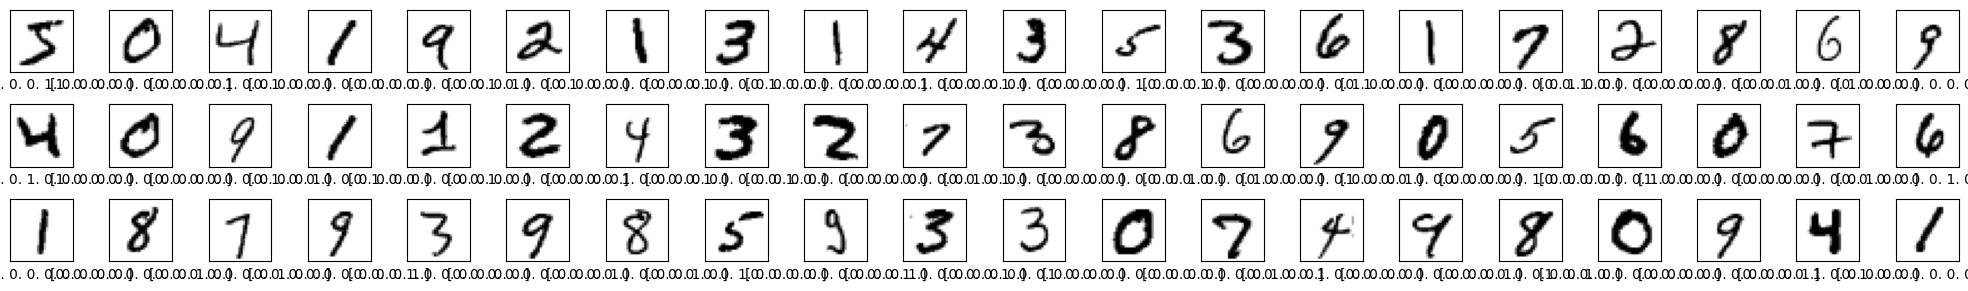

In [3]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [4]:
def build_model():
    model = keras.Sequential([
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ])
    return model

model = build_model()

In [5]:
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [6]:
history_sgd = model_sgd.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)

test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/7
750/750 [==============================] - 15s 20ms/step - loss: 0.8619 - accuracy: 0.7561 - val_loss: 0.3142 - val_accuracy: 0.9014
Epoch 2/7
750/750 [==============================] - 16s 21ms/step - loss: 0.2555 - accuracy: 0.9225 - val_loss: 0.1875 - val_accuracy: 0.9457
Epoch 3/7
750/750 [==============================] - 16s 22ms/step - loss: 0.1772 - accuracy: 0.9472 - val_loss: 0.1520 - val_accuracy: 0.9575
Epoch 4/7
750/750 [==============================] - 17s 23ms/step - loss: 0.1361 - accuracy: 0.9583 - val_loss: 0.1218 - val_accuracy: 0.9644
Epoch 5/7
750/750 [==============================] - 17s 23ms/step - loss: 0.1129 - accuracy: 0.9661 - val_loss: 0.1046 - val_accuracy: 0.9703
Epoch 6/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0973 - accuracy: 0.9709 - val_loss: 0.0895 - val_accuracy: 0.9739
Epoch 7/7
750/750 [==============================] - 17s 23ms/step - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.0832 - val_accuracy: 0.9758

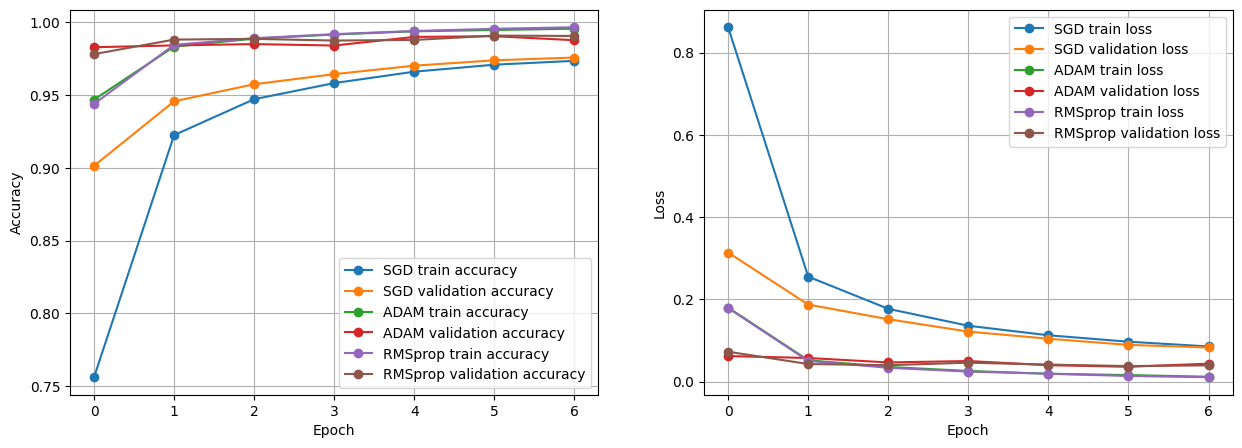

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='ADAM train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'ADAM validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='ADAM train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='ADAM validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()